#Modelo de Reconocimiento de Digitos con Redes Neuronales Convolucionales (CNN)

Este cuaderno tiene como objetivo desarrollar un modelo de reconocimiento de digitos utilizando Redes Neuronales Convolucionales (CNN) en el conjunto de datos MNIST. El conjunto MNIST es un conjunto de imagenes de digitos escritos a mano, ampliamente utilizado en la comunidad de aprendizaje automatico.

##Objetivo del Proyecto

El objetivo principal es construir y entrenar un modelo de aprendizaje profundo capaz de reconocer digitos escritos a mano con alta precision. Para ello, utilizaremos una arquitectura de red neuronal convolucional, que es especialmente efectiva en tareas de vision por computadora como el reconocimiento de imagenes.

##Conjunto de Datos MNIST

MNIST contiene imagenes en escala de grises de 28x28 pixeles de digitos del 0 al 9. Cada imagen esta etiquetada con el digito correspondiente. Este conjunto de datos es un punto de partida ideal para la comprension y practica de la construccion de modelos de reconocimiento de patrones.

##Desarrollo del Modelo

El flujo de trabajo incluira la preparacion de datos, la construccion del modelo, el entrenamiento y la evaluacion del rendimiento. Ademas, se exploraran metricas clave y visualizaciones para comprender el comportamiento y la eficacia del modelo.

In [1]:
!pip install scikit-learn

In [2]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=51874524cc88d5d3725c599fedd689ad7c83acc48ebe5706edbba074b6dbe7de
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [3]:
!pip install keras

## Librerias Utilizadas

### NumPy (np)
- **Descripcion:**NumPy es una biblioteca fundamental en Python para el procesamiento numerico. Proporciona soporte para arreglos multidimensionales y funciones matematicas eficientes.
- **Uso en el Proyecto:** Se utiliza para la generacion de numeros aleatorios y manipulacion de datos.

### Matplotlib (plt)
- **Descripcion:** Matplotlib es una biblioteca de visualizacion en 2D en Python. Se utiliza para crear graficos y visualizaciones.
- **Uso en el Proyecto:**Se utiliza para visualizar imagenes y representar graficos de metricas.

### Keras y TensorFlow
- **Keras:**Una interfaz de alto nivel para construir y entrenar modelos de aprendizaje profundo.
- **TensorFlow:** Una plataforma de codigo abierto para aprendizaje automaico y profundo.
- **Uso en el Proyecto:** Se utilizan para construir y entrenar modelos de CNN. TensorFlow proporciona el backend para Keras.

### Scikit-Learn
- **Descripcion:** Scikit-Learn es una biblioteca de aprendizaje automatico en Python con herramientas sencillas y eficientes para el analisis de datos y modelado estadistico.
- **Uso en el Proyecto:**Se utiliza para calcular la matriz de confusion y otras metricas de evaluacion.

## Descripcion del Modelo

El modelo se construye utilizando la arquitectura de Red Neuronal Convolucional (CNN). Se emplean capas de convolucion, capas de pooling, y capas totalmente conectadas para aprender patrones en las imagenes del conjunto de datos MNIST. El objetivo es lograr un alto rendimiento en la clasificacion de digitos escritos a mano.

In [4]:
import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt
from keras.datasets import mnist
# from keras.utils import np_utils
from keras.utils import to_categorical

from keras.models import Sequential
# from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense,BatchNormalization,Dropout

# from keras.layers.core import Flatten, Dense
from keras.optimizers import SGD

from sklearn.metrics import confusion_matrix
import seaborn as sns

#Carga y Exploracion del Conjunto de Datos MNIST

Aqui cargamos el conjunto de datos MNIST, que consiste en imagenes de digitos escritos a mano y sus correspondientes etiquetas. Este conjunto de datos es ampliamente utilizado para tareas de reconocimiento de patrones y aprendizaje automatico.

##Funcionamiento del Codigo

1. **Carga del Conjunto de Datos:** Utilizamos la funcion `mnist.load_data()` de la biblioteca Keras para cargar el conjunto de datos. Este conjunto se divide en conjuntos de entrenamiento y prueba.

2. **Visualizacion de Dimensiones:** Se imprimen las dimensiones de los conjuntos de entrenamiento y prueba. Esto nos proporciona informacion sobre la cantidad de muestras y la forma de las imagenes en cada conjunto.

3. **Visualizacion de Forma de Datos:**
   - `x_train.shape`:Forma del conjunto de entrenamiento que muestra el numero de imagenes y las dimensiones de cada imagen.
   - `y_train.shape`:Forma del conjunto de etiquetas de entrenamiento que indica el numero de etiquetas.
   - `x_test.shape`:Forma del conjunto de prueba.
   - `y_test.shape`:Forma del conjunto de etiquetas de prueba.

Este paso es crucial para comprender la naturaleza del conjunto de datos antes de construir y entrenar el modelo de reconocimiento de digitos.


In [5]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Proceso de Normalizacion de Imagenes

En esta seccion se lleva a cabo un proceso fundamental conocido como normalizacion de imagenes. La normalizacion es una practica comun en el procesamiento de imagenes y tiene como objetivo ajustar los valores de pixeles para que esten en una escala especifica.

## Razones para la Normalizacion

Las imagenes, representadas por matrices de pixeles, generalmente tienen valores en el rango de 0 a 255, donde 0 representa la ausencia de intensidad (negro) y 255 representa la maxima intensidad (blanco). La normalizacion implica dividir todos los valores de pixeles por el valor maximo posible (255 en este caso).

Principales Razones:

1. **Escalamiento uniforme:** La normalizacion garantiza que todos los pixeles tengan valores en una escala de 0 a 1, lo que facilita el entrenamiento del modelo al asegurar una escala uniforme en todas las imagenes.

2. **Mejora de la convergencia:** Ayuda a que el proceso de entrenamiento sea mas eficiente y rapido, ya que las actualizaciones de peso durante el entrenamiento son mas coherentes.

3. **Evitar problemas numericos:**Reduce la posibilidad de problemas numericos, ya que los valores entre mas pequeños son menos propensos a generar errores numericos en calculos.

En resumen, la normalizacion es una practica esencial para garantizar que el modelo aprenda de manera efectiva y se beneficie de una entrada coherente y escalada adecuadamente.


In [6]:
x_train = x_train/255
x_test = x_test/255

# Codificacion One-Hot de Etiquetas

En este bloque de codigo, se aplica una tecnica conocida como codificacion one-hot a las etiquetas del conjunto de datos. Esta transformacion es comunmente utilizada en problemas de clasificacion y es especialmente util cuando se trabaja con modelos de aprendizaje automatico.

## Razones para la Codificacion One-Hot
La codificacion one-hot es un proceso de conversion de variables categoricas en un formato que puede ser proporcionado a algoritmos de aprendizaje automatico para mejorar el rendimiento del modelo. En el contexto de las etiquetas de clasificacion, cada etiqueta se convierte en un vector binario que tiene un tamaño igual al numero de clases posibles.

1. **Compatibilidad con Modelos:** Muchos algoritmos de aprendizaje automatico, incluidos los utilizados en Keras, requieren que las etiquetas esten en formato one-hot para un procesamiento adecuado.

2. **Representacion Binaria:** Cada etiqueta se convierte en un vector binario con un unico bit activado (1) en la posicion correspondiente a la clase, y todos los demas bits desactivados (0).

## Funcionamiento del Codigo

- `to_categorical(y_train, nclases)`: Convierte las etiquetas de entrenamiento en formato one-hot, donde `nclases` representa el numero total de clases posibles.

- `to_categorical(y_test, nclases)`: Aplica la misma transformacion a las etiquetas de prueba.

Este paso es esencial para garantizar que las etiquetas sean compatibles con el modelo y que el proceso de entrenamiento se realice de manera optima.


In [7]:
nclases=10
y_train=to_categorical(y_train,nclases)
y_test=to_categorical(y_test,nclases)

# Visualizacion de una Imagen y su Etiqueta Asociada

En este fragmento de codigo, realizamos la visualizacion de una imagen especifica del conjunto de entrenamiento junto con su etiqueta asociada. Esto nos permite inspeccionar visualmente una muestra del conjunto de datos MNIST.

## Funcionamiento del Codigo

- `plt.imshow(x_train[numimagen,:].reshape(28,28), cmap='gray_r')`: Utiliza Matplotlib para mostrar la imagen ubicada en la posicion `numimagen` del conjunto de entrenamiento. La imagen se remodela a una matriz 28x28 y se utiliza la paleta de colores en escala de grises inversa ('gray_r').

- `plt.title('Categoria: ' + str(np.argmax(y_train[nimagen])))`: Agrega un titulo a la imagen que muestra la categoria o etiqueta asociada. La funcion `np.argmax` se utiliza para obtener la clase a la que pertenece la imagen.

- `plt.axis('off')`: Elimina los ejes para una presentacion mas limpia.

Este paso nos permite visualizar una instancia del conjunto de datos y confirmar que la imagen y la etiqueta asociada coinciden correctamente. Ademas, sirve como una verificacion visual del formato de las imagenes y etiquetas antes de continuar con la construccion y entrenamiento del modelo.


(-0.5, 27.5, 27.5, -0.5)

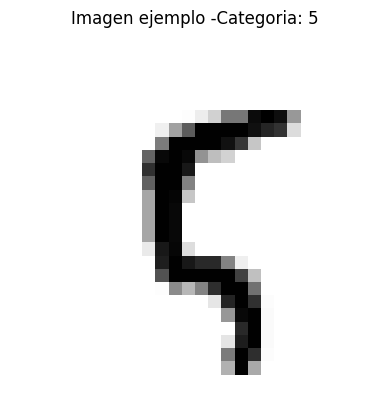

In [8]:
nimagen=100
plt.imshow(x_train[nimagen,:].reshape(28,28),cmap='gray_r')
plt.title('Imagen ejemplo -Categoria: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')

In [9]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.reshape)



(60000, 28, 28, 1)
<built-in method reshape of numpy.ndarray object at 0x7ed1b146e190>


# Definicion y Resumen del Modelo CNN

En esta seccion se define y presenta la arquitectura del modelo de Red Neuronal Convolucional (CNN) que sera utilizado para el reconocimiento de digitos.

## Arquitectura del Modelo

1. **Capa de Convolucion 1:**
   - Numero de Filtros: 2
   - Tamaño del Kernel: (5,5)
   - Funcion de Activacion: ReLU
   - Tamaño de Entrada: (28,28,1)

2. **Capa de MaxPooling 1:**
   - Tamaño del Pooling: (2,2)
   - Stride: 2

3. **Capa de Convolucion 2:**
   - Numero de Filtros: 4
   - Tamaño del Kernel: (3,3)
   - Funcion de Activacion: Sigmoid

4. **Capa de MaxPooling 2:**
   - Tamaño del Pooling: (2,2)
   - Stride: 2

5. **Capa Flatten:**
   - Transforma la salida de las capas convolucionales en un vector unidimensional.

6. **Capas Densas (Fully Connected):**
   - Capa Densa 1: 120 neuronas, Funcion de Activacion: ReLU
   - Capa Densa 2: 120 neuronas, Funcion de Activacion: ReLU
   - Capa de Salida: Numero de Clases, Funcion de Activacion: Softmax

7. **Funcion de Perdida y Optimizador:**
   - Loss: Categorical Crossentropy
   - Optimizador: Gradiente Descendente Estocastico (SGD) con tasa de aprendizaje 0.1

## Resumen del Modelo
Se imprime un resumen que muestra la arquitectura de cada capa, el numero de parametros entrenables y la forma de la salida de cada capa.

Este paso es crucial para comprender la estructura del modelo antes de entrenarlo y evaluar su rendimiento en la tarea de reconocimiento de digitos.


In [17]:
model=Sequential()
model.add(Conv2D(filters=2, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=4, kernel_size=(3,3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(nclases,activation='softmax'))

sgd = SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 2)         52        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 2)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 4)         76        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 4)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [18]:
nepochs=10
tam_lote=128
entrenamiento=model.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 25s 51ms/step - loss: 0.9372 - accuracy: 0.6945 - val_loss: 0.2781 - val_accuracy: 0.9199
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.2291 - accuracy: 0.9298 - val_loss: 0.1737 - val_accuracy: 0.9451
Epoch 3/10
469/469 [==============================] - 26s 56ms/step - loss: 0.1690 - accuracy: 0.9479 - val_loss: 0.1516 - val_accuracy: 0.9518
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 0.1372 - accuracy: 0.9578 - val_loss: 0.1105 - val_accuracy: 0.9644
Epoch 5/10
469/469 [==============================] - 23s 50ms/step - loss: 0.1197 - accuracy: 0.9637 - val_loss: 0.1013 - val_accuracy: 0.9686
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.1067 - accuracy: 0.9671 - val_loss: 0.0918 - val_accuracy: 0.9722
Epoch 7/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.0947 - val_accuracy:

313/313 [==============================] - 2s 6ms/step


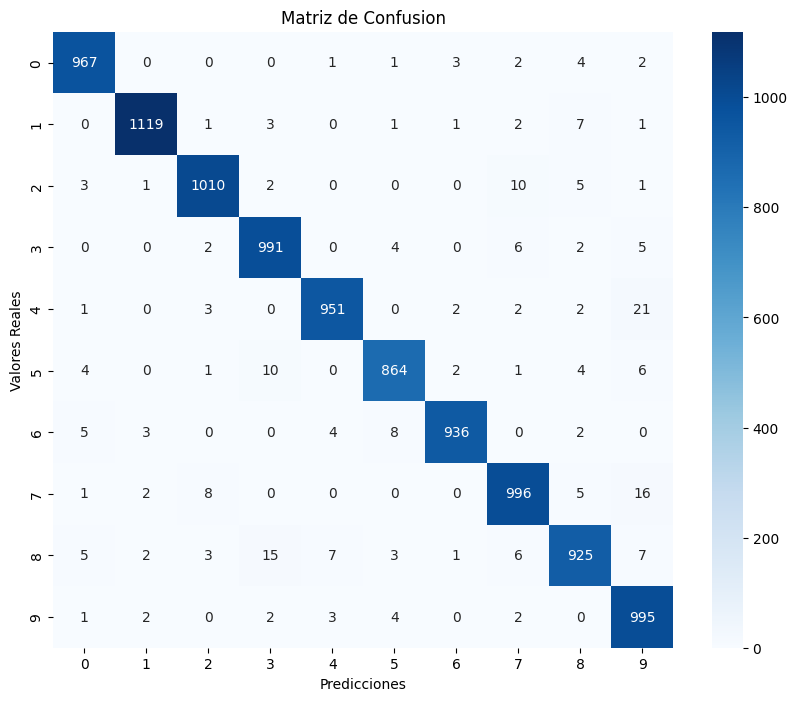

In [19]:


# Utiliza predict para obtener las probabilidades de las clases
y_probs = model.predict(x_test)

# Utiliza np.argmax para obtener las clases predichas
y_pred = np.argmax(y_probs, axis=1)

y_ref = np.argmax(y_test, axis=1)

# Calcula la matriz de confusion
cm = confusion_matrix(y_ref, y_pred)

# Define las etiquetas de las clases
etiquetas = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Crea un mapa de calor (heatmap) usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusion')
plt.show()


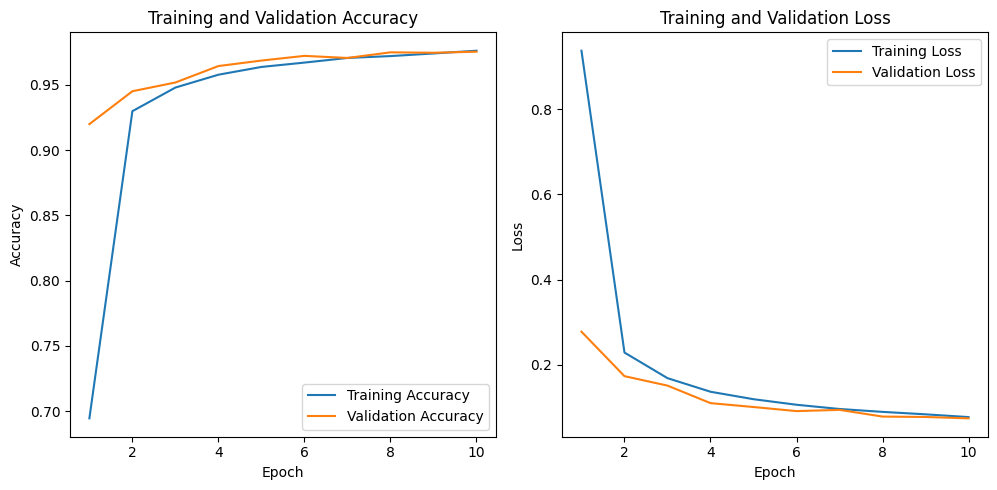

In [20]:

# Extract history metrics
acc = entrenamiento.history['accuracy']
val_acc = entrenamiento.history['val_accuracy']
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
# train_auc = entrenamiento.history['auc']  # Ajusta el nombre correcto de la metrica
# val_auc = entrenamiento.history['val_auc']  # Ajusta el nombre correcto de la metrica

epochs = range(1, len(acc) + 1)
# Imprimir las metricas disponibles en el historial
# print(entrenamiento.keys())
# Crear subgraficas para precision, perdida y AUC
plt.figure(figsize=(15, 5))

# Graficar precision
plt.subplot(1, 3, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Graficar perdida
plt.subplot(1, 3, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Graficar AUC
# plt.subplot(1, 3, 3)
# plt.plot(epochs, train_auc, label='Training AUC')
# plt.plot(epochs, val_auc, label='Validation AUC')
# plt.title('Training and Validation AUC')
# plt.xlabel('Epoch')
# plt.ylabel('AUC')
# plt.legend()

plt.tight_layout()
plt.show()